# Predict Weather Dataset
In this project, we will train a model to predict weather with machine learning. We will act as if we do not have access to the weather forecast. We have access to a century of historical averages of global temperatures, including global maximum temperatures, global minimum temperatures, and global land and ocean temperatures. Having all this, we know that this is a supervised regression machine learning problem.

[Source link](https://thecleverprogrammer.com/2020/08/30/predict-weather-with-machine-learning/)

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [43]:
df = pd.read_csv("data/GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [45]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

## Preprocessing the data

### Dropping rows with null values

In [46]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


In [47]:
df.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [48]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Dropping columns that have high cardinality
High cardinality refers to columns whose values ​​are very rare or unique. Given the frequency of high cardinality data in most time-series datasets, we will solve this problem directly by completely removing these high cardinality columns from our dataset so as not to confuse our model in the future.

In [49]:
df = df.drop(columns=[
    "LandAverageTemperatureUncertainty",
    "LandMaxTemperatureUncertainty",
    "LandMinTemperatureUncertainty",
    "LandAndOceanAverageTemperatureUncertainty",
])
df.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
1200,1850-01-01,0.749,8.242,-3.206,12.833
1201,1850-02-01,3.071,9.970,-2.291,13.588
1202,1850-03-01,4.954,10.347,-1.905,14.043
1203,1850-04-01,7.217,12.934,1.018,14.667
1204,1850-05-01,10.004,15.655,3.811,15.507


### Convert the "dt" column to datetime object

In [50]:
df["dt"] = pd.to_datetime(df["dt"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   dt                              1992 non-null   datetime64[ns]
 1   LandAverageTemperature          1992 non-null   float64       
 2   LandMaxTemperature              1992 non-null   float64       
 3   LandMinTemperature              1992 non-null   float64       
 4   LandAndOceanAverageTemperature  1992 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 93.4 KB


In [51]:
df["year"] = df["dt"].dt.year
df = df.drop(columns=["dt"])
df = df.set_index("year")
df.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
year,,,,
1850,0.749,8.242,-3.206,12.833
1850,3.071,9.970,-2.291,13.588
1850,4.954,10.347,-1.905,14.043
1850,7.217,12.934,1.018,14.667
1850,10.004,15.655,3.811,15.507


### Describing the dataset

In [58]:
df.describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
count,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,14.350601,2.743595,15.212566
std,4.263193,4.309579,4.155835,1.274093
min,0.404000,5.900000,-5.407000,12.475000
25%,4.430000,10.212000,-1.334500,14.047000
50%,8.850500,14.760000,2.949500,15.251000
75%,12.858500,18.451500,6.778750,16.396250
max,15.482000,21.320000,9.715000,17.611000


## Visualizing the dateset

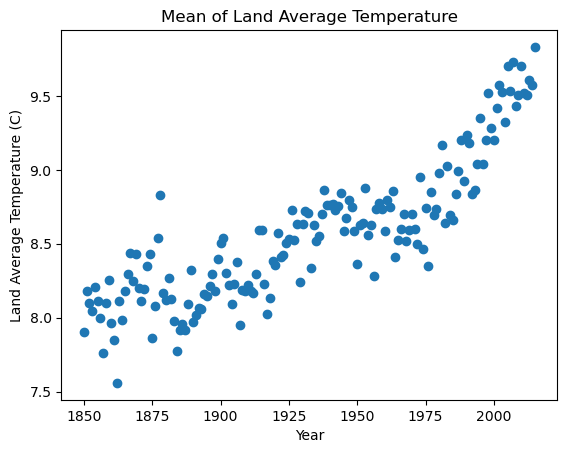

In [52]:
mean_temp_year = df.groupby(by="year")["LandAverageTemperature"].mean()
plt.scatter(x=mean_temp_year.index, y=mean_temp_year.values)
plt.xlabel("Year")
plt.ylabel("Land Average Temperature (C)")
plt.title("Mean of Land Average Temperature");

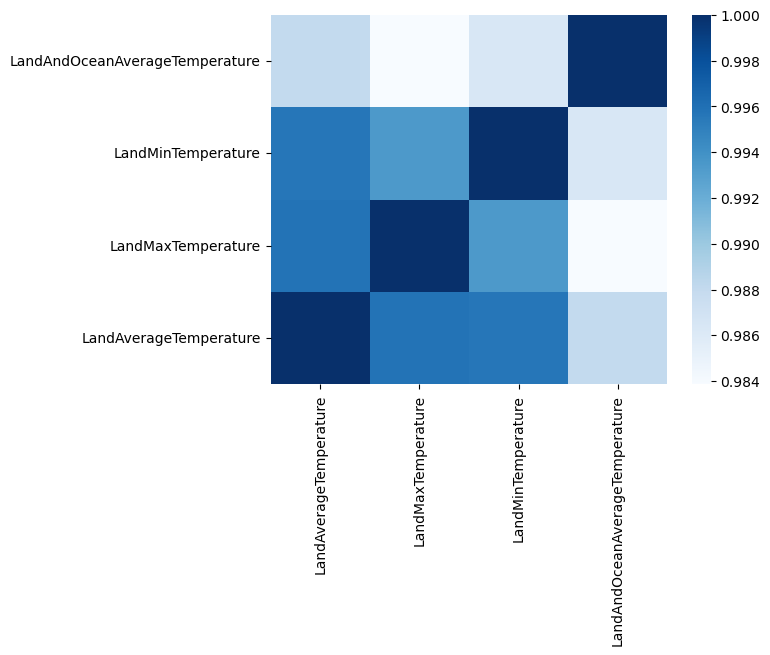

In [56]:
ax = sns.heatmap(df.corr(), cmap="Blues")
ax.invert_yaxis()

## Matrix of features and labels

In [57]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

print(f"\nFirst five rows of X: \n{X[:5, :]}")
print(f"\nFirst five rows of y: \n{y[:5]}")

X (1992, 3)
y (1992,)

First five rows of X: 
[[ 0.749  8.242 -3.206]
 [ 3.071  9.97  -2.291]
 [ 4.954 10.347 -1.905]
 [ 7.217 12.934  1.018]
 [10.004 15.655  3.811]]

First five rows of y: 
[12.833 13.588 14.043 14.667 15.507]


## Splitting the dataset to train set and test set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (1593, 3)
X_test (399, 3)
y_train (1593,)
y_test (399,)


## Training the Random Forest Regression model

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=77)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=77)

## Predicting the test set

In [66]:
y_pred = regressor.predict(X_test)
pd.options.display.precision = 2
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,16.39,16.16
1,15.44,15.04
2,13.26,13.38
3,13.26,13.32
4,15.56,15.48
5,15.93,16.15
6,15.88,15.83
7,14.16,13.81
8,16.14,16.12
9,16.83,16.83


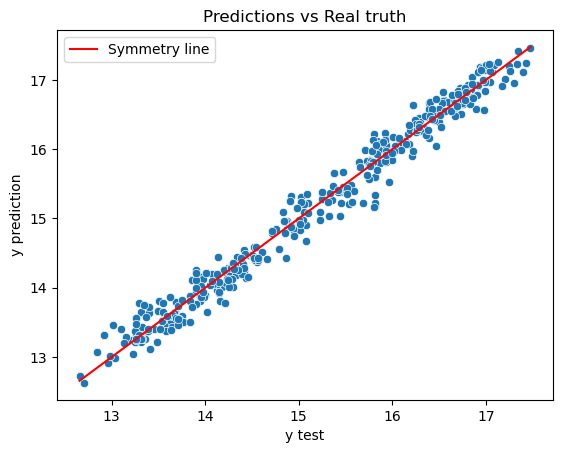

In [67]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot();

## Plotting the residuals

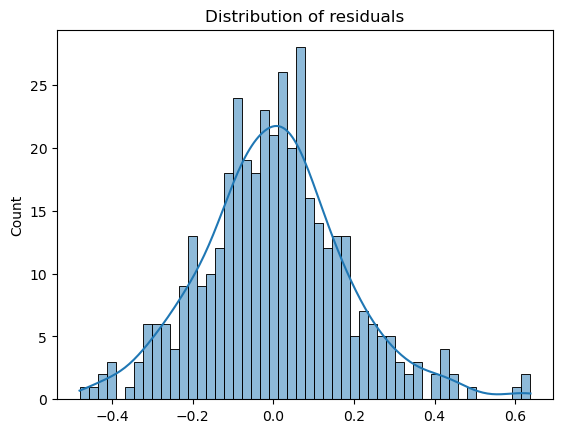

In [68]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Evaluating the model

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")
print(f"The mse of the model: {mse:.3f}")

The R2 score of the model: 0.981
The mse of the model: 0.032
